<center><img src='https://drive.google.com/uc?export=view&id=1qJ8NqAZolTBQY7lN-deZ8xEsU3dlUiLz' width=200></center>


<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>Recherche d'Information et traitement de données massives </center>
    <center> Lab 7 : Personnalisation : Systèmes de recommandation </center>
<hr style=" border:none; height:3px;">
</h1>

Ce lab a pour objectif de vous familiariser avec le problème de la recommandation par la réalisation d'un système de recommandation de films.  

## Avant de démarrer

Dans ce lab nous allons utiliser la bibliothèque Panda. Pour la découvir (si ce n'est pas déjà fait), nous vous proposons un petit tuto que vous pouvez récupérer [ici](https://github.com/wassilaOuerdane/Lab7_TutoPanda_2021.git)

## Démarrage du Lab7

Comme pour les précédents labs, pour le cas du lab effectué sur colab, voici les **instructions pour permettre l'importation de ce dossier Data fournie avec ce lab :**

1.   Dans le dossier Lab7_Recom-2021 téléchargé depuis git, vous trouverez une archive Archive_Lab7.zip.
2.   Ouvrir le panneau Fichiers de colab (c'est à dire cliquez sur le logo en forme de dossier à gauche) et cliquez sur le premier bouton en haut à gauche vous permettant de télécharger. Téléchargez ainsi l'Archive_Lab7.zip dans votre colab. Si besoin actualiser jusqu'à voir l'archive apparaître dans le panneau. 
3.    Exécutez la céllule de code suivante pour déziper l'archive.

In [ ]:
!unzip Archive_Lab7.zip

### Avant propos : un bref rappel du Filtrage Collaboratif

Le problème de la recommandation vise à prédire des scores de pertinence personnalisés à l’utilisateur pour un item, objet non vu. Différentes approches existent : filtrage collaboratif, basées sur le contenu, basées sur la connaissances, ...  (voir le cours 7)

Dans ce Lab on s'intéressera au Filtrage collaboratif. L'idée est de prendre en compte les relations de similarité entre les utilisateurs et les éléments. En d'autres termes, la similarité entre éléments est déterminée en prenant en
compte les notes des utilisateurs ayant jugés ces éléments.

<center><img src='https://drive.google.com/uc?export=view&id=1FjcxWD9IarWw3JAxhvTmagECHoZU-hjp' width=350></center>



Deux types de filtrage collaboratif :

- **Approche par voisinnage (memory-based)** : cette approche calcule la prédiction d'un item $i$ pour un utilisateur $x$ en se basant sur les plus proches voisins de $x$ (i.e. ceux dont l'ensemble de notations est similaire à l'ensemble des notation de $x$). 

- **Approche par modèles (model-based)** : cette approche cherche à predire le score d'un item $i$ pour un utilisateur $x$, sur la base des items qui sont similaires à $i$. Donc, l'estimation de la note pour l’élément se fait à partir des notes des éléments de $x$ similaires à $i$.

## PARTIE 1 : Exercice


<div class="alert alert-block alert-danger">
<b>Note : </b> un exercice sur un fichier pdf séparé est disponible sur EDUNAO et Teams. Il vous permettra de réviser plus simplement les concepts du cours.
</div>

## PARTIE 2 : Applicaton au corpus MovieLens

Dans cette partie nous travaillerons sur la base du corpus [MOVIELENS dataset](https://grouplens.org/datasets/movielens/) qui contient les jugements de films d'un ensemble d'utilisateurs ainsi que des informations sur les utilisateurs et sur les films. L'objectif de cette partie est de mettre en place un système de recommandation de films à partir de ce corpus. 
Il s'agira par exemple de pouvoir répondre à la question suivante : *quels sont les films pouvant plaire à une personne étant donné la connaissance sur cette personne (e.g. les autres films qu'elle a aimé ou les utilisateurs ressemblant à cette personne) ?* 

Pour ce travail, il est conseillé de travailler avec le [MovieLens 100K Dataset](https://grouplens.org/datasets/movielens/100k/) et de tester ensuite votre approche sur les datasets de  taille plus conséquente :
 + MovieLens 1M Dataset (1M de notes sur 4000 films par 6000 utilisateurs), disponible [ici](https://grouplens.org/datasets/movielens/1m/)
 + MovieLens 10M Dataset (10M de notes sur 10 000 films par 72000 utilisateurs, disponible [ici](https://grouplens.org/datasets/movielens/10m/)
 
Pour répondre aux différentes questions nous allons faire appel à la bibliothque Pandas, numpy et matplotlib, que nous vous proposons d'installer en executant les cellules suivantes. 

In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

### Etude du corpus

Une des premières choses à faire est de prendre connaissance de ce corpus et de calculer quelques informations statistiques sur ce corpus. A l'aide des bibliothèques [pandas](https://pandas.pydata.org/), et [numpy](https://www.numpy.org),  répondez aux questions qui vont suivre concernant le corpus. Mais avant cela, nous allons introduire quelques éléments descriptifs utiles sur le corpus.

Le corpus MOVIELENS est disponible [ici](https://grouplens.org/datasets/movielens/100k/).  Plus précisemment, ce corpus est constitué des fichiers suivants :

+ Le fichier [u.data](./Data/ml-100k/u.data) : regroupe l'ensemble des données : 100000 notations par 943 utilisateurs sur 1682 items. Chaque utilisateur  a noté au moins 20 films.  Cette table contient:  

               user id | item id | rating | timestamp.           
          
  les utilisateurs et les items sont numérotés à partir de  1 et les données sont aléatoirement ordonées.  
  
              
+ Le fichier [u.user](./Data/ml-100k/u.user) : information démographique sur les utiliisateurs. Il contient: 
                         
              user id | age | gender | occupation | zip code
                         
                            
+ Le fichier [u.item](./Data/ml-100k/u.item) : contient les informations sur les items (films) : 
              
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              


**Le code suivant permet d'extraire le contenu de ces fichiers.** 


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#column headers for the dataset

data_cols = ['user_id','item_id','rating','timestamp']

#items' table
item_cols = ['movie id','movie title','release date',
'video release date','IMDb URL','unknown','Action',
'Adventure','Animation','Childrens','Comedy','Crime',
'Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance ','Sci-Fi','Thriller',
'War' ,'Western']


#users' table
user_cols = ['user id','age','gender','occupation',
'zip code']

#importing the data files onto dataframes

# Note: pour les presonnes sur Colab attention a mettre ./Archive_Lab7/Data/ au lieu de ./Data/

users = pd.read_csv('./Data/ml-100k/u.user', sep='|',names=user_cols, encoding='latin-1')
item = pd.read_csv('./Data/ml-100k/u.item', sep='|',names=item_cols, encoding='latin-1')
data = pd.read_csv('./Data/ml-100k/u.data', sep='\t',names=data_cols, encoding='latin-1')




FileNotFoundError: [Errno 2] No such file or directory: './Data/ml-100k/u.user'

In [ ]:
#printing the head of these dataframes

print("User information")
print(users.head()) # it will print only the head. To have the whole table remove .head()

User information
   user id  age gender  occupation zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [2]:
print("Item information")
item.head()


Item information


NameError: name 'item' is not defined

In [ ]:
print("Data information")
data.head()

Data information


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


**1- Quel est le nombre de films et d'utilisateurs du corpus ?**



In [ ]:
nb_users = data.user_id.unique().shape[0]
nb_items = data.item_id.unique().shape[0]

print("Number of users : ", nb_users)
print("Number of movies : ", nb_items)

Number of users :  943
Number of movies :  1682


**2- Contruire la matrice d'utilité**

In [ ]:
movie_matrix = data.pivot_table(index='user_id', columns='item_id', values='rating')
movie_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**3- Quelle est la note moyenne de chaque film ?**

In [ ]:
ratings = pd.DataFrame(data.groupby('item_id')['rating'].mean())
ratings.head()

,rating
item_id,
1,3.878319
2,3.206107
3,3.033333
4,3.550239
5,3.302326


**4- Visualisation de la distribution des notes**

<div class="alert alert-block alert-danger">
<b>Warning: </b> if you did not install yet matplotlip, excute in a separate cell `!pip install matplotlib` 
</div>


Remarque : `%matplotlib`configure la bibliothèque que vous allez utiliser pour dessiner le graphique. Elle effectue donc un certain nombre de traitements pour préparer l'affichage du graphique. Elle est souvent utilisée avec l'argument `inline`, qui indique que l'on va utiliser la bibliothèque intégrée à Notebook. 

Pour la fonction `hist()` des exemples [ici](https://www.science-emergence.com/Articles/Simple-histogramme-avec-matplotlib/)


<AxesSubplot:>

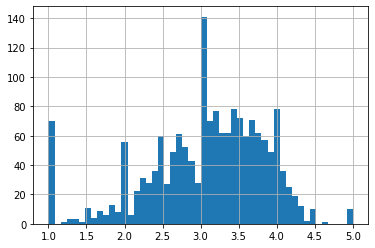

In [ ]:
# Attention ces instructions ne peuvent être executées sans la réalisation de la question 3. 

import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

 **5- Quel est le nombre de notes pour chaque film ?**

In [ ]:
ratings['number_of_ratings'] = data.groupby('item_id')['rating'].count()
ratings.head()

,rating,number_of_ratings
item_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


**6- Visualiser le nombre de notes pour chaque film (comme nous l'avons fait question 4)**

<AxesSubplot:>

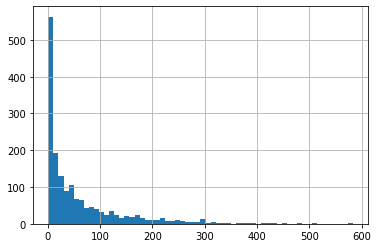

In [ ]:
ratings['number_of_ratings'].hist(bins=60)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


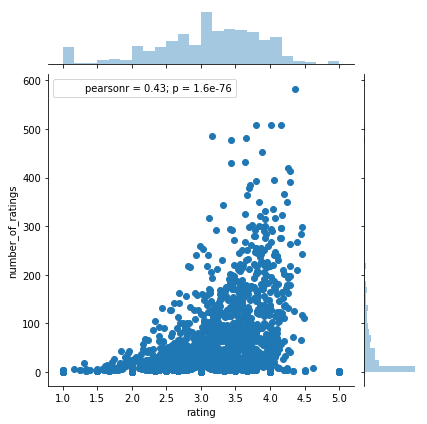

In [ ]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

## Système de recommandation

### Préparation de l'évaluation

Une première phase dans le problème de prédiction de la recommandation est de préparer l'étape d'évaluation de votre système de recommandationn en séparant l'ensemble de données en  un ensemble de test et en un ensemble d'apprentissage. 

<center><img src='https://drive.google.com/uc?export=view&id=1i6nY-QOBnZAyWr5dlQraDHHToZLbgqU7' width=300></center>


- L'ensemble d'apprentissage sera utilisé pour construire la matrice d'utilité, calculer le score de similarité et faire la prédiction. 
- L'ensemble de test sera utilisé dans la phase d'évaluation.


<div class="alert alert-block alert-danger">
<b>Warning: </b> if you did not install yet sklearn, excute in a separate cell `!pip install sklearn`
</div> 

In [ ]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
     |████████████████████████████████| 7.3 MB 4.2 MB/s eta 0:00:01     |███████████████████████████████▉| 7.3 MB 4.2 MB/s eta 0:00:01
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done


**Séparons nos données `data` en deux sous ensembles : un ensemble d'apprentissage et un ensemble de test. On prendra par exemple une taille d'ensemble de test de $0.25$**.

Indication : on fera appel à la fonction `model_selection()` dont la documentation se trouve [ici](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
from sklearn import model_selection 

# TO COMPLETE
train_data, test_data = model_selection.train_test_split(data, test_size=0.25)

In [ ]:
print("Taindata\n")
print(train_data.head())

Taindata

       user_id  item_id  rating  timestamp
25971      409      483       4  881107602
38288      356     1294       4  891405721
2413       131      100       5  883681418
36538      104      405       3  888466028
90356      731      494       3  886179161


In [ ]:
print("test_data", test_data.head())

test_data        user_id  item_id  rating  timestamp
90801      463      286       4  877387935
53639      407      135       3  875119886
73039      503      496       5  880472474
29359      533       82       4  879439204
77813      936      268       4  886831415


### Approche par voisinage (user-item, Memory-based)

Il s'agit d'implémenter la méthode de filtrage collaboratif par voisinage **user-item** en suivant les étapes qui suivent.


### Etape 1 : 

**a- Construire la matrice user-item à partir de l'ensemble des données. (Cela vous permettra de visualiser le contenu des données qui sont considérées pour l'apprentissage.)** 

Attention : on utilisera la matrice `train_data`.

In [ ]:


movie_matrix = train_data.pivot_table(index='user_id', columns='item_id', values='rating')
movie_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1671,1672,1673,1674,1675,1676,1677,1679,1680,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,4.0,3.0,3.0,5.0,4.0,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**b- Constuire la matrice contenant que les notes ou les évaluations des différents items. On appelera cette matrice train_data_matrix. C'est cette matrice qui sera utilisée par la suite pour faire nos calculs de similarités et de prédictions.**

Attention : on utilisera la matrice `train_data`.

In [ ]:
import numpy as np

train_data_matrix = np.zeros((nb_users, nb_items))
for line in train_data.itertuples():
    print(line[3])
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

print(train_data_matrix)


[[5. 0. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**c- Construire la matrice de test contenant que les évalaution (ou les notations) des différents items. On appelara cette matrice `test_data_matrix`. C'est cette matrice qui sera utilisée par la suite dans la phase évaluation**. 

In [ ]:
test_data_matrix = np.zeros((nb_users, nb_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

print(test_data_matrix)

[[0. 3. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


#### Etape 2 : Construire et Calculer la matrice de similarité entre utilisateurs. 

On utilisera pour cela la mesure **cosinus** :

$$sim(x,y) = cos (r_x,r_y) = \frac{r_x.r_y}{||r_x||.||r_y||}$$


(on pourra utiliser pour cela la méthode **pairwise\_distances** de scikit-learn documentée [ici](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html)). 


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances


user_similarity = pairwise_distances(train_data_matrix, metric='cosine')


In [ ]:
print(user_similarity)

[[0.         0.8525451  0.95230791 ... 0.89441235 0.87582434 0.73652168]
 [0.8525451  0.         0.91635091 ... 0.84190719 0.87777518 0.94822225]
 [0.95230791 0.91635091 0.         ... 0.87511083 0.88570738 0.9638483 ]
 ...
 [0.89441235 0.84190719 0.87511083 ... 0.         0.88034137 0.91062439]
 [0.87582434 0.87777518 0.88570738 ... 0.88034137 0.         0.85604555]
 [0.73652168 0.94822225 0.9638483  ... 0.91062439 0.85604555 0.        ]]


<div class="alert alert-block alert-danger">
<b>Conseil : </b> terminer en premier le travail avec la mesure cosinus. Une fois la fonction de prédiction mise en place et que celle-ci fonctionne vous pouvez revenir pour écrire la
    fonction de similarité avec Pearson et la tester ensuite avec la fonction de prédiction. 
</div>

**Faire le même travail avec la mesure de corrélation de Pearson comme mesure de similarité entre les différents vecteurs de notes et définie comme, étant donnés deux utilisateurs $x$ et $y$ :**

$$ sim(x,y) = \frac{\sum_{s \in S_{xy}} (r_{xs} - \overline{r_x})(r_{ys} - \overline{r_y}) }{ \sqrt{\sum_{s \in S_{xy}} (r_{xs} - \overline{r_x})^2}   \sqrt{\sum_{s \in S_{xy}} (r_{ys} - \overline{r_y})^2}  }$$

avec $\overline{r_y}$ et  $\overline{r_x}$ la notation moyenne de $x$ et $y$.

Calculer cette métrique pour chaque paire d'utilisateurs dans la base de données.


**Remarque**: `pearsonr()` da la bibliothèque `stats` retourne un deux-tuple composé du coefficient de corrélation et de la p-valeur:

Le coefficient de corrélation peut varier de -1 à +1.L'hypothèse nulle est que les deux variables ne sont pas corrélées. La valeur de $p$ est un nombre compris entre zéro et celui qui représente la probabilité que vos données se serait produites si l'hypothèse nulle était vraie.
Pour plus de détails, voir http://www.eecs.qmul.ac.uk/~norman/blog_articles/p_values.pdf

In [ ]:
#Exemple
from scipy import stats
import numpy as np

a = np.array([0, 0, 0, 1, 1, 1, 1])
b = np.arange(7)
stats.pearsonr(a, b)[0]

0.8660254037844386

In [ ]:
from scipy import stats
# TO COMPLETE

### Etape 3 :  Construire la matrice de prédictions en utilisant la formule suivante.

La note de l'utilisateur $x$ sur l'élément $i$ est calculée comme :

$$ r_{xi} = \overline{r_x} + \frac{\sum_{y \in N} sim(x,y) (r_{yi} -\overline{r_y})}{\sum_{y \in N} | sim(x,y)|}$$


Avec: $\overline{r}_x$ la note moyenne de l'utilisateur $x$ et $r_{yi}$ la note de l'utilisateur $y$ qui a jugé $i$.




**Ecrire la fonction `predict(ratings, similarity, type='user')` qui prendra en entrée les évaluations, la matrice de similarités et un troisième argument qui est `type='user'`. Il est intéressant de le considérer pour pourvoir réutiliser la fonction dans l'approche par modèles en mettant `type='item'`.** 

**Encore une fois vous pouvez écrire simplement la fonction `predict(ratings, similarity)` qui retournera à la fin la matrice de prédictions des différents items pour les différents utilisateurs.**

In [ ]:
def predict(ratings, similarity, type='user'):
    
    if type == 'user':
        print(len(ratings[1]))
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
user_prediction = predict(train_data_matrix, user_similarity, type='user')

1682
[4. 0. 0. ... 0. 0. 0.]
ici [0.4334126  0.10939358 0.07431629 0.04994055 0.21046373 0.35077289
 0.71403092 0.09036861 0.04340071 0.33709869 0.27526754 0.08382878
 0.85136742 0.18489893 0.12306778 0.25505351 0.039239   0.50178359
 0.03626635 0.06123662 0.19619501 0.21046373 0.25267539 0.12722949
 0.13674197 0.13971463 0.03745541 0.13555291 0.06539834 0.07431629
 0.06064209 0.0529132  0.039239   0.03686088 0.03210464 0.03983353
 0.09631391 0.20095125 0.04458977 0.04399524 0.08442331 0.30618312
 0.37871581 0.24673008 0.07728894 0.05826397 0.0451843  0.1117717
 0.26159334 0.03983353 0.03388823 0.117717   0.0529132  0.11593341
 0.03032105 0.32045184 0.1706302  0.24732461 0.63436385 0.39714625
 0.02972652 0.33947681 0.14209275 0.32758621 0.13674197 0.06183115
 0.04340071 0.05053508 0.10107015 0.20927467 0.06718193 0.23127229
 0.11117717 0.04756243 0.09988109 0.12425684 0.12009512 0.03032105
 0.11296076 0.04994055 0.0921522  0.23483948 0.22294887 0.1254459
 0.4803805  0.03567182 0.357907

In [ ]:
print(user_prediction)

[[ 1.56184391  0.55331953  0.5009738  ...  0.28449747  0.28453743
   0.2842643 ]
 [ 1.30305389  0.27544604  0.19232274 ... -0.05728811 -0.05594577
  -0.05589883]
 [ 1.32743656  0.23897     0.16231717 ... -0.09375539 -0.09198177
  -0.09193703]
 ...
 [ 1.18133062  0.19532201  0.11405586 ... -0.12914493 -0.12827083
  -0.1282433 ]
 [ 1.37079357  0.31278528  0.25651701 ...  0.00866365  0.00935378
   0.00973194]
 [ 1.38379781  0.35320187  0.30798131 ...  0.0874553   0.08753234
   0.08747436]]


### Etape 4 :  Evaluer votre prédiction avec la mesure RMSE (Root Mean Squared Error).


$$\sqrt{\frac{1}{n} \sum_{xi} (r_{xi} - r_{xi}^{*})^{2}}$$
où, $r_{xi}^{*}$ correspond à la valeur prédite pour $r_{xi}$.

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [ ]:

print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))

User-based CF RMSE: 3.1331639351386804


In [1]:
sparsity=round(1.0-len(data)/float(nb_users*nb_items),3)
print('The sparsity level of MovieLens100K is ' +  str(sparsity*100) + '%')

NameError: ignored

## Approche par modèles : **item-item**

<div class="alert alert-block alert-danger">
<b>Conseil : </b>  à faire une fois la partie memory-based réalisée. 
</div>

#### **Faire le même travail avec l'approche item-item. Il est possible  de réutiliser les fonctions implémentées précédemment.**

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')
print(item_similarity)

[[0.         0.71212207 0.73912744 ... 1.         0.94532334 0.94532334]
 [0.71212207 0.         0.7645909  ... 1.         0.90789917 1.        ]
 [0.73912744 0.7645909  0.         ... 1.         1.         0.89776027]
 ...
 [1.         1.         1.         ... 0.         1.         1.        ]
 [0.94532334 0.90789917 1.         ... 1.         0.         1.        ]
 [0.94532334 1.         0.89776027 ... 1.         1.         0.        ]]


In [ ]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
#print(item_prediction)
print(np.transpose(item_prediction))

[[0.35982821 0.09196331 0.07208854 ... 0.0247534  0.14313561 0.19156267]
 [0.37462728 0.10516297 0.07460356 ... 0.03237348 0.15090598 0.1912388 ]
 [0.38381196 0.10244313 0.0728038  ... 0.03090388 0.15931311 0.2052582 ]
 ...
 [0.43604488 0.10842187 0.07104262 ... 0.03622126 0.16666476 0.23968155]
 [0.42778797 0.10962726 0.07423161 ... 0.03534362 0.16489851 0.23254411]
 [0.42336847 0.10955292 0.07474728 ... 0.03542828 0.16702472 0.23197738]]


In [ ]:
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

Item-based CF RMSE: 3.4601991727164085
